#Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

In [2]:
dataset=pd.read_csv("/content/dataset_2.csv")

# Split Test and Train

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop(labels=['target'], axis=1),
    dataset['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [12]:
y_train

17967    1
32391    1
9341     0
7929     1
46544    0
        ..
21243    1
45891    1
42613    1
43567    0
2732     1
Name: target, Length: 35000, dtype: int64

In [ ]:
roc_values = []
for feat in X_train.columns:
    # Initialize DecisionTreeClassifier 
   clf= DecisionTreeClassifier(random_state=0)
    # fit the data 
   clf.fit(X_train[feat].fillna(0).to_frame(), y_train)
   # obtain the prediction Probality based on X_test
   y_scored =clf.predict_proba(X_test[feat].to_frame())
   # Create roc data based on comparison of y_test and probability of getting true
   roc_values.append(roc_auc_score(y_test, y_scored[:,1]))



Text(0, 0.5, 'roc-auc')

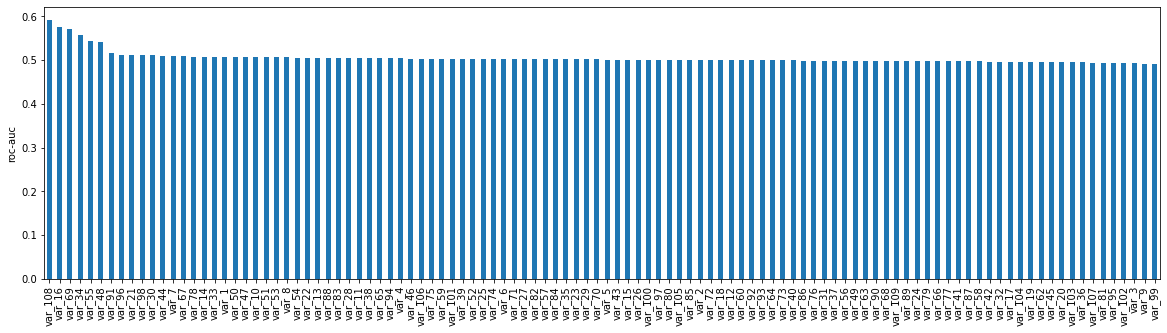

In [25]:
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.ylabel('roc-auc')

In [26]:
# a roc auc value of 0.5 indicates random decision
selected_features = roc_values[roc_values > 0.5].index
selected_features

Index(['var_1', 'var_2', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_10',
       'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_18',
       'var_21', 'var_22', 'var_23', 'var_25', 'var_26', 'var_27', 'var_28',
       'var_29', 'var_30', 'var_33', 'var_34', 'var_35', 'var_38', 'var_39',
       'var_43', 'var_44', 'var_46', 'var_47', 'var_48', 'var_50', 'var_51',
       'var_52', 'var_53', 'var_54', 'var_55', 'var_57', 'var_59', 'var_65',
       'var_67', 'var_69', 'var_70', 'var_71', 'var_72', 'var_74', 'var_75',
       'var_78', 'var_80', 'var_82', 'var_83', 'var_84', 'var_85', 'var_88',
       'var_91', 'var_94', 'var_96', 'var_97', 'var_98', 'var_100', 'var_101',
       'var_105', 'var_106', 'var_108'],
      dtype='object')

In [27]:
# select features in the dataframes
X_train = X_train[selected_features]
X_test = X_test[selected_features]
X_train.shape, X_test.shape

((35000, 67), (15000, 67))